## 🗃️ **Import necessary libraries**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [32]:
# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [33]:
print(train_data.head())

   id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   1         M       11.840         18.70           77.93      440.6   
1   2         B       12.760         18.84           81.87      496.6   
2   3         M       23.290         26.67          158.90     1685.0   
3   4         B       12.560         19.07           81.92      485.8   
4   5         B        9.742         15.67           61.50      289.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11090           0.15160         0.12180              0.05182   
1          0.09676           0.07952         0.02688              0.01781   
2          0.11410           0.20840         0.35230              0.16200   
3          0.08760           0.10380         0.10300              0.04391   
4          0.09037           0.04689         0.01103              0.01407   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         16.82          

## 🧹 **Data Cleaning**

-drop the id column as it’s likely not informative

In [34]:
train_data.drop(columns=['id'], inplace=True)
## test_data.drop(columns=['id'], inplace=True)

- checking for missing values 

In [35]:
# Check for missing values in the training data
missing_values_train = train_data.isnull().sum()
print("Missing values in training data:\n", missing_values_train)

Missing values in training data:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [36]:
# Check for missing values in the test data
missing_values_test = test_data.isnull().sum()
print("Missing values in test data:\n", missing_values_test)

Missing values in test data:
 id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


- No missing values 

In [37]:
# Separate features and target
X = train_data.drop(columns=['diagnosis'])
y = train_data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Encode 'M' as 1 and 'B' as 0

In [38]:
# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 📂 **Data Scaling**

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## 🗞️ **Feature Engineering**

-Apply PCA for further dimensionality reduction

In [40]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [41]:
print(f'Explained variance ratio after PCA: {pca.explained_variance_ratio_}')

Explained variance ratio after PCA: [0.42776383 0.191963   0.10058872 0.06803941 0.05928906 0.0367584
 0.02295897 0.01749057 0.01386672 0.0135103 ]


-Total variance explained=0.4278+0.1920+0.1006+0.0680+0.0593+0.0368+0.0230+0.0175+0.0139+0.0135=0.9524

In [42]:
print(f'Number of features after PCA: {pca.n_components_}')

Number of features after PCA: 10


## ♦️ ** Model Training** ♦️

In [43]:
log_reg = LogisticRegression()

In [44]:
log_reg.fit(X_train_pca, y_train)
y_pred_logreg_pca = log_reg.predict(X_val_pca)

In [45]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

## 🤖 **Model Evaluation**

In [46]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

In [47]:
evaluate_model(y_val, y_pred_logreg_pca, "Logistic Regression")

Evaluation for Logistic Regression:
Accuracy: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[59  0]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        21

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Eplaining the results 

-
1. Accuracy:
1.0000 This means the model predicted all instances in the validation set correctly.
2. ROC AUC:
1.0000  A ROC AUC of 1.0 indicates that the model is perfectly distinguishing between the classes (benign and malignant tumors). It shows that the model is not making any false positives or false negatives.
3. Confusion Matrix:
[[59  0]
 [ 0 21]]
59 : true negatives (correctly predicted benign tumors).
21 : true positives (correctly predicted malignant tumors).
No false negatives or false positives
4. Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        21
Precision, recall, and F1-score are all 1.00 for both classes: This means the model is performing optimally, with no errors in classification.

## 📂 **Create the submission file**

In [48]:
print(len(test_data['id']))         
print(len(y_pred_logreg_pca))

169
80


In [49]:
print(test_data.shape)
print(X_val.shape)      

(169, 31)
(80, 30)


In [50]:
X_test = test_data.drop(['id'], axis=1)

In [51]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [52]:
y_pred_test = log_reg.predict(X_test_pca)

In [53]:
TumorPrediction_LR = pd.DataFrame({
    'id': test_data['id'],   
    'diagnosis': y_pred_test  
})

In [54]:
TumorPrediction_LR['diagnosis'] = TumorPrediction_LR['diagnosis'].map({0: 'B', 1: 'M'})

In [55]:
TumorPrediction_LR.to_csv('TumorPrediction_LR.csv', index=False)

In [56]:
print("Submission file created successfully!")

Submission file created successfully!


## **Making sure that the Model is not overfitting**

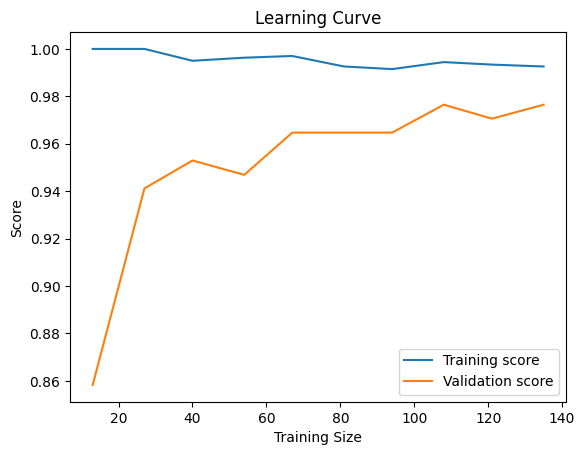

In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg,X_test_pca,y_pred_test, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

-
1. Training Score :

The training score remains relatively high but not perfect, stabilizing around the 0.98 mark. This indicates that the model fits the training data quite well, but not as perfectly as in the previous case (where it was 1.00).

2. Validation Score :

The validation score is lower than the training score, starting around 0.86 and rising to about 0.96. This suggests that the model is able to generalize to some extent, but there is still a noticeable gap between the training and validation scores.

-While there is a gap between the training and validation scores, indicating that the model may be overfitting to the training data, the validation score is still relatively high. The training score not being perfect (not at 1.00) suggests that the model is not overly complex.

The fact that the validation score increases with training size is a good sign, indicating that the model is learning from more data.